# PyTorch Learn

- [learn from video series](https://www.youtube.com/watch?v=Csa5R12jYRg&list=PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG&index=5)

 ## Verifying the installation

In [14]:
import torch 

In [15]:
print(torch.__version__)

1.2.0


In [16]:
torch.cuda.is_available()

True

In [17]:
torch.version.cuda

'10.0'

## Using CUDA

- GPU is good at parallel computation.

In [18]:
t = torch.tensor([1,2,3])
t

tensor([1, 2, 3])

In [20]:
t = t.cuda()
t

tensor([1, 2, 3], device='cuda:0')

## Tensor

- tensor是数学上的说法,在计算机领域tensor即为n维数组(nd-array)
- 标量是零维tensor，向量是一维tensor，矩阵是二维tensor

### Rank

- rank是一个张量的维数 如一个矩阵是一个rank-2张量
- rank表示需要多少下标(indices)来得到一个数据
- rank标明了axes的数量

### Axis

- 张量的某个维度(a specific dimension of a tensor)
- 若一个张量是二位张量，则它有两个Axis(Axes)
- 每一个axis的长度表示在这一个axis中有效的下标(indices)数量

### Shape

- 是由张量每一个axis的长度决定的

In [22]:
dd = [[1,2,3],[4,5,6],[7,8,9]]
t = torch.tensor(dd)
t

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [23]:
type(t)

torch.Tensor

In [24]:
t.shape

torch.Size([3, 3])

- 上面的张量t的每一个axis长度为3
- shape的长度等于张量的rank
- 要注意，**shape每一个分量的乘积必须等于数据的个数**

In [25]:
len(t.shape)

2

#### Reshape

**Shape $6 \times 1$**

- number
- scalar
- array
- vector
- 2d-array
- matrix

**Shape $2 \times 3$**

- number,array,2d-array
- scalar,vector,matrix

**Shape $3 \times 2$**

- number,scalar
- array,vector
- 2d-array,matrix

- reshaping只是改变数据的分组，而不改变数据

In [26]:
t_reshape = t.reshape(1,9)
t_reshape

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [27]:
t_reshape.shape

torch.Size([1, 9])

### Take input tensor of CNN as an example

- 通常CNN的输入张量的rank为4
- 最后两个axes分别是图像的Height和width
- 第二个axis是color channel，即RGB
- 第一个axis是batch的大小，即里面含多少个samples

### PyTorch Tensor

In [1]:
import numpy as np
import torch

#### Tensor Class

- Tensors in PyTorch are represented using the ``torch.Tensor`` class

In [2]:
t = torch.Tensor()
type(t)

torch.Tensor

#### Tensor Attributes

In [5]:
print(t.dtype)
print(t.device)
print(t.layout)
print(torch.device('cuda:0')) #指定下标为0的GPU

torch.float32
cpu
torch.strided
cuda:0


- 张量之间的运算 张量的``dtype``必须相同
- 两个张量的运算 必须在同一个device上

#### Create tensors options

In [6]:
data = np.array([1,2,3])
type(data)

numpy.ndarray

In [7]:
torch.Tensor(data) # 注意tensor是float类型

tensor([1., 2., 3.])

In [8]:
torch.tensor(data) # 注意tensor是int类型

tensor([1, 2, 3], dtype=torch.int32)

In [9]:
torch.as_tensor(data)

tensor([1, 2, 3], dtype=torch.int32)

In [10]:
torch.from_numpy(data)

tensor([1, 2, 3], dtype=torch.int32)

#### Best Options to Create Tensor

In [11]:
t1 = torch.Tensor(data) # .Tensor is a class constructor
t2 = torch.tensor(data) # .tensor is a factory function input a param return an object
t3 = torch.as_tensor(data)# .as_tensor is a factory function
t4 = torch.from_numpy(data)# same as above

In [12]:
print(t1.dtype)
print(t2.dtype)
print(t3.dtype)
print(t4.dtype)

torch.float32
torch.int32
torch.int32
torch.int32


In [13]:
torch.get_default_dtype()

torch.float32

- 后三个factory function返回与输入的data同类型的tensor 这个叫做**type inference**
- ``dtype``可以设定

In [14]:
torch.tensor(np.array([1,2,3]),dtype=torch.float64)

tensor([1., 2., 3.], dtype=torch.float64)

- 如果更改data的值(而非tensor的值)，上面的四个选项会有不同的结果

In [15]:
data[0] = 0
data[1] = 0
data[2] = 0

In [16]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
tensor([0, 0, 0], dtype=torch.int32)
tensor([0, 0, 0], dtype=torch.int32)


- 前两个 在tensor中保存了最原始的data的值，修改data不会影响张量 **copy memory of the data**
- 后两个 保存了“现在”data的数据 **share memory of the data**
- Best option is ``torch.tensor()``
- 如果想要节约内存，提高性能 ``torch.as_tensor()``
    - 注意事项
    - ``numpy.ndarray``是分配在CPU上的，如果要用GPU，``as_tensor()``必须将数据从CPU复制 到GPU
    - ``as_tensor()``does not work with **built-in Python data structures like lists**
- ``torch.as_tensor()``可以接受任何形式的array
- ``torch.from_numpy()``只能接受numpy array

### Tensor Operations

1. Reshaping
2. Element-wise
3. Redution
4. Access

#### Reshaping

In [17]:
import torch

In [18]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
],dtype = torch.float32)

In [21]:
t.size() # get shape

torch.Size([3, 4])

In [22]:
t.shape # get shape

torch.Size([3, 4])

In [23]:
len(t.shape) # get rank

2

In [24]:
torch.tensor(t.shape).prod() # get elements number

tensor(12)

In [25]:
t.numel() # get elements number

12

In [26]:
t.reshape(1,12)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

In [27]:
t.reshape(2,6)

tensor([[1., 1., 1., 1., 2., 2.],
        [2., 2., 3., 3., 3., 3.]])

In [28]:
t.reshape(4,3)

tensor([[1., 1., 1.],
        [1., 2., 2.],
        [2., 2., 3.],
        [3., 3., 3.]])

##### Squeezing Unsqueezing

- Squeezing操作将tensor变为1d
- Unsqueezing操作将tensor的rank加一

In [29]:
print(t.reshape(1,12))
print(t.reshape(1,12).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


In [30]:
print(t.reshape(1,12).squeeze())
print(t.reshape(1,12).squeeze().shape)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])


In [31]:
print(t.reshape(1,12).squeeze().unsqueeze(dim=0))
print(t.reshape(1,12).squeeze().unsqueeze(dim=0).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


##### Flatten

- 是reshape和squeeze的结合
- CNN中convolutional layer传递给fully connected layer的张量 must be flatten out

In [32]:
def flatten(t):
    t = t.reshape(1,-1) # -1是获得一个tensor中数据的数量
    t = t.squeeze()
    return t

In [33]:
flatten(t)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

##### Concatenating

In [34]:
t1 = torch.tensor([
    [1,2],
    [3,4]
])

In [35]:
t2 = torch.tensor([
    [5,6],
    [7,8]
])

In [36]:
torch.cat((t1,t2),dim=0) # first axis cat

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [37]:
torch.cat((t1,t2),dim=1) # second axis cat

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

##### Stack vs Concat

- Concatenating joins a sequence of tensors along **an existing axis**
- Stacking joins a sequence of tensors **along a new axis**

In [48]:
import torch

In [55]:
t1 = torch.tensor([1,1,1])
t2 = torch.tensor([2,2,2])
t3 = torch.tensor([3,3,3])

In [60]:
torch.cat(
    (t1,t2,t3),
    dim = 0
)

torch.Size([9])

In [64]:
torch.cat(
    (
    t1.unsqueeze(0),
    t2.unsqueeze(0),
    t3.unsqueeze(0)
    ),
    dim = 0
)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

In [62]:
torch.stack(
    (t1,t2,t3),
    dim=0
)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

In [63]:
torch.stack(
    (t1,t2,t3),
    dim=1
)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

##### CNN Flatten Operation——Tensor Batch Processing

In [38]:
import torch

In [43]:
t1 = torch.tensor([
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]
])

t2 = torch.tensor([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2]
])

t3 = torch.tensor([
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3]
])

t4 = torch.tensor([
    [4,4,4,4],
    [4,4,4,4],
    [4,4,4,4],
    [4,4,4,4]
])

In [44]:
t = torch.stack((t1,t2,t3))

In [45]:
t.shape

torch.Size([3, 4, 4])

In [46]:
t

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [47]:
t = t.reshape(3,1,4,4)
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [48]:
t[0]

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [49]:
t[0][0]

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

In [50]:
t[0][0][0]

tensor([1, 1, 1, 1])

In [51]:
t[0][0][0][0]

tensor(1)

- flatten each image use PyTorch built-in function ``flatten``
- 或可以直接用``reshape``

In [52]:
t.flatten(start_dim = 1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [54]:
t.flatten(start_dim=1).shape

torch.Size([3, 16])

In [55]:
t.reshape(3,-1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

#### Element-Wise

- to implement element-wise operation, two tensors must have the same shape
- element-wise component-wise point-wise mean the same thing

In [57]:
import torch
import numpy as np

In [58]:
t1 = torch.tensor([
    [1,2],
    [3,4]
],dtype = torch.float32)

t2 = torch.tensor([
    [9,8],
    [7,6]
],dtype = torch.float32)

- addtion,substract,multiply,divide is an element-wise operation

In [59]:
t1 + t2

tensor([[10., 10.],
        [10., 10.]])

- notice that scalar can be used in element-wise operations 
- this concept is **tensor broadcasting**

In [64]:
np.broadcast_to(2,t1.shape) # broadcast

array([[2, 2],
       [2, 2]])

In [60]:
t1 + 2 # equals to t1.add(2)

tensor([[3., 4.],
        [5., 6.]])

In [61]:
t1 -2 # equals to  t1.sub(2)

tensor([[-1.,  0.],
        [ 1.,  2.]])

In [62]:
t1 * 2 # equals to t1.mul(2)

tensor([[2., 4.],
        [6., 8.]])

In [63]:
t1 / 2 # equals to t1.div(2)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

- shape不同的tensor也可以进行运算,low rank通过broadcast升维

In [65]:
t1 = torch.tensor([
    [1,1],
    [1,1]
],dtype = torch.float32)

t2 = torch.tensor([2,4],dtype = torch.float32)

In [67]:
np.broadcast_to(t2.numpy(),t1.shape)

array([[2., 4.],
       [2., 4.]], dtype=float32)

In [69]:
t1 + t2

tensor([[3., 5.],
        [3., 5.]])

- **Comparison operations** are also element-wise

In [70]:
t = torch.tensor([
    [0,5,7],
    [6,0,7],
    [0,8,0]
],dtype = torch.float32)

In [71]:
t.eq(0) # eq 等于

tensor([[ True, False, False],
        [False,  True, False],
        [ True, False,  True]])

In [72]:
t.lt(0) # lt 小于

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [73]:
t.le(0) # le 小于等于

tensor([[ True, False, False],
        [False,  True, False],
        [ True, False,  True]])

In [74]:
t.gt(0) #  gt 大于

tensor([[False,  True,  True],
        [ True, False,  True],
        [False,  True, False]])

In [75]:
t.ge(0) # ge 大于等于

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

- 上面均用到了**Broadcasting**

#### Redution

- 减少张量中数据的数量
- 求和操作是Redution操作
- 通常情况下是对特定的axis进行reduction操作

In [76]:
import torch
import numpy as np

In [77]:
t = torch.tensor([
    [0,1,0],
    [2,0,2],
    [0,3,0]
],dtype = torch.float32)

In [78]:
t.sum()

tensor(8.)

In [79]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
],dtype = torch.float32)

In [80]:
t.sum(dim = 0)

tensor([6., 6., 6., 6.])

In [82]:
t[0] + t[1] + t[2]

tensor([6., 6., 6., 6.])

In [81]:
t.sum(dim = 1)

tensor([ 4.,  8., 12.])

In [83]:
t[0].sum()

tensor(4.)

In [84]:
t[1].sum()

tensor(8.)

In [85]:
t[2].sum()

tensor(12.)

In [92]:
torch.stack((t[0].sum(),t[1].sum(),t[2].sum()))

tensor([ 4.,  8., 12.])

##### Argmax

- 返回tensor中最大值的下标

In [93]:
t= torch.tensor([
    [1,0,0,2],
    [0,3,3,0],
    [4,0,0,5]
],dtype = torch.float32)

In [94]:
t.max()

tensor(5.)

In [95]:
t.argmax()

tensor(11)

In [96]:
t.flatten()

tensor([1., 0., 0., 2., 0., 3., 3., 0., 4., 0., 0., 5.])

In [97]:
t.max(dim = 0)

torch.return_types.max(
values=tensor([4., 3., 3., 5.]),
indices=tensor([2, 1, 1, 2]))

In [98]:
t.argmax(dim= 0)

tensor([2, 1, 1, 2])

In [99]:
t.max(dim =1 )

torch.return_types.max(
values=tensor([2., 3., 5.]),
indices=tensor([3, 2, 3]))

In [100]:
t.argmax(dim =1 )

tensor([3, 2, 3])

#### Access

- get tensor value as a number
- ``item()`` only works with scalar value tensor

In [101]:
t = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
],dtype = torch.float32)

In [102]:
t.mean()

tensor(5.)

In [103]:
t.mean().item()

5.0

In [104]:
t.mean(dim = 0).tolist()

[4.0, 5.0, 6.0]

In [105]:
t.mean(dim = 0).numpy()

array([4., 5., 6.], dtype=float32)

## CNN——Fashion MNIST

### Prepare Data——Learn to extract,transform,load(ETL)

- Extract:Get image data from source
- Transfrom:Put data into tensor
- Load: put data into an object to make it easily accessible
- ``torch.utils.data.Dataset`` is an **abstract class** for representing a dataset
- ``torch.utils.data.DataLoader`` **wraps a dataset** and provides access to the underlying data

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# create an instance
train_set = torchvision.datasets.FashionMNIST(
    root= './DeepLearningData/FashionMNIST',
    train = True,
    download=True, # extract
    # transform
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

100.0%

Extracting ./DeepLearningData/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./DeepLearningData/FashionMNIST\FashionMNIST\raw


111.0%

Extracting ./DeepLearningData/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./DeepLearningData/FashionMNIST\FashionMNIST\raw


100.0%

Extracting ./DeepLearningData/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./DeepLearningData/FashionMNIST\FashionMNIST\raw


159.1%

Extracting ./DeepLearningData/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./DeepLearningData/FashionMNIST\FashionMNIST\raw
Processing...
Done!


- ``train_set``

In [7]:
type (train_set)

torchvision.datasets.mnist.FashionMNIST

In [20]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 10
)

In [21]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
sample = next(iter(train_set))

In [24]:
len(sample)

2

In [25]:
type(sample)

tuple

In [26]:
image,label = sample

In [27]:
image.shape

torch.Size([1, 28, 28])

In [29]:
type(label)

int

In [30]:
type(image)

torch.Tensor

label: 9


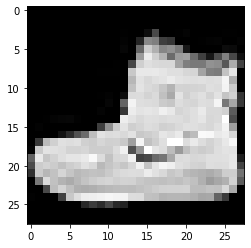

In [17]:
plt.imshow(image.squeeze(dim = 0),cmap='gray')
print('label:',label)

- ``train_loader``

In [31]:
batch = next(iter(train_loader))

In [32]:
len(batch)

2

In [33]:
type(batch)

list

In [35]:
images,labels = batch

In [36]:
images.shape

torch.Size([10, 1, 28, 28])

In [37]:
labels.shape

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


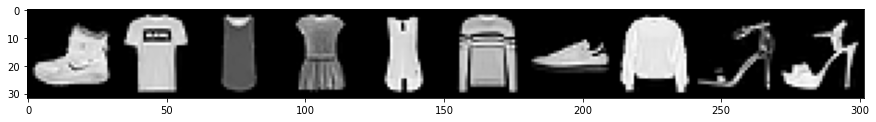

In [46]:
grid = torchvision.utils.make_grid(images,nrow = 10)

plt.figure(figsize = (15,15))
plt.imshow(np.transpose(grid,(1,2,0))) #这里transpose 是因为RGB Channel要在最后一个axis
print('labels:',labels)

- [关于``torchvision.utils.make_grid``维度变化的解释](https://www.cnblogs.com/aoru45/p/10629025.html)

In [47]:
np.transpose(grid,(1,2,0)).shape

torch.Size([32, 302, 3])

### Build the model

#### Something about OOP

- class是一个抽象的概念，而创建的object是实实在在的
- 创建的关于一个类的对象称为**一个实例**——instance
    - 一个实例由两部分组成：方法(Methods)和属性(Attributes)
    - methods are the behaviors of an object, represents:code
    - attributes are the characteristics(propeties) of an object,represenst:data

### Object Oriented Neural Networks

- ``torch.nn``包是PyTroch神经网络的Lib
- 神经网络每一层(是一个object)有两个必须的components
    - a transformation——code
    - a collection of weights——data

#### Forward Pass

- the process of a tensor flowing through a network
- every PyTorch ``nn.Module`` has a ``forward()`` method to represent forward pass
- when building layers, we must provide an implementation of this method

#### Build model steps

1. Extend the ``nn.Module`` base class
2. Define layers as class attributes
3. Implement the ``forward()``method

In [25]:
import torch.nn as nn 
import torch.nn.functional as F

In [26]:
class Network:
    def __init__(self):
        self.layer = None
    
    def forward(self,t):
        t = self.layer(t)
        return t

In [27]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
    
    def forward(self,f):
        # (1) input layer
        t  = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2,stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t,dim=1)
        
        return t

- **dense layer** **linear layer** **fully connected layer** are the same thing

In [5]:
network = Network()

In [18]:
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

- argument和parameter的区别
    - argument是从函数外调用函数时传入的值(value)
    - parameter是函数内部的局部变量，相当于占位符
    - 如``in_features``是parameter,``192``是传入的值
- hyperparamter是人为选取的

#### CNN HyperParameters

- 卷积层``kernel_size``设置``filter``的大小
- 卷积层``out_channels``设置``filter``的数目，也称为``feature maps``
- 全连层``out_features``输出张量（rank==1）的大小
- ``in_channels``和``out_features``是data-dependent parameters

In [19]:
network.conv1.weight

Parameter containing:
tensor([[[[ 0.1054, -0.1885,  0.1572, -0.1500,  0.0241],
          [ 0.0374, -0.1555,  0.0355, -0.0736, -0.0020],
          [-0.0883, -0.0090, -0.1859,  0.1714,  0.0499],
          [-0.0426, -0.0134,  0.1055, -0.0630, -0.0637],
          [ 0.1737,  0.0615,  0.0132, -0.0623, -0.0302]]],


        [[[ 0.1007,  0.1805, -0.1308,  0.1958, -0.1508],
          [-0.0248,  0.0560, -0.1343, -0.0834,  0.0354],
          [ 0.0785,  0.1115,  0.0138, -0.0650,  0.0193],
          [-0.1698, -0.1472,  0.1635, -0.1369, -0.0093],
          [ 0.1393, -0.1660, -0.0448,  0.0935, -0.0296]]],


        [[[ 0.1893, -0.0806,  0.1558,  0.0710,  0.0352],
          [-0.1858, -0.1623,  0.0228, -0.1011, -0.0331],
          [-0.1629, -0.1311,  0.1184,  0.0153, -0.1122],
          [ 0.0167, -0.0443,  0.1843, -0.1844,  0.0777],
          [ 0.1768,  0.0818, -0.0358, -0.0053,  0.0915]]],


        [[[-0.1758, -0.1382, -0.0230, -0.0580,  0.0033],
          [-0.0387,  0.0649, -0.0593,  0.0683, -0.0077

In [20]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [21]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [22]:
network.fc1.weight.shape

torch.Size([120, 192])

In [23]:
network.fc2.weight.shape

torch.Size([60, 120])

In [24]:
network.out.weight.shape

torch.Size([10, 60])

In [2]:
import torch
import torch.nn as nn 
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)

In [3]:
train_set = torchvision.datasets.FashionMNIST(
    root= './DeepLearningData/FashionMNIST',
    train = True,
    download=True, # extract
    # transform
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [12]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
    
    def forward(self,t):
        # (1) input layer
        t  = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2,stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t,dim=1)
        
        return t

In [27]:
network = Network()

In [28]:
data_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=10
)

In [29]:
batch = next(iter(data_loader))

In [32]:
images, labels = batch
images.shape

torch.Size([10, 1, 28, 28])

In [33]:
preds = network(images)

In [34]:
preds

tensor([[ 0.0480,  0.0302, -0.0123,  0.0634,  0.0899,  0.0587, -0.0098, -0.0141,  0.0206,  0.1156],
        [ 0.0461,  0.0331, -0.0119,  0.0635,  0.0946,  0.0564, -0.0101, -0.0156,  0.0263,  0.1202],
        [ 0.0476,  0.0303, -0.0115,  0.0631,  0.0916,  0.0557, -0.0100, -0.0147,  0.0224,  0.1157],
        [ 0.0472,  0.0333, -0.0100,  0.0632,  0.0890,  0.0550, -0.0113, -0.0144,  0.0200,  0.1149],
        [ 0.0479,  0.0340, -0.0131,  0.0644,  0.0913,  0.0524, -0.0085, -0.0118,  0.0211,  0.1166],
        [ 0.0458,  0.0291, -0.0108,  0.0653,  0.0903,  0.0563, -0.0093, -0.0129,  0.0213,  0.1166],
        [ 0.0467,  0.0249, -0.0119,  0.0695,  0.0878,  0.0488, -0.0072, -0.0091,  0.0185,  0.1157],
        [ 0.0480,  0.0274, -0.0122,  0.0651,  0.0863,  0.0566, -0.0075, -0.0120,  0.0157,  0.1171],
        [ 0.0488,  0.0300, -0.0158,  0.0633,  0.0939,  0.0503, -0.0084, -0.0114,  0.0286,  0.1159],
        [ 0.0497,  0.0289, -0.0180,  0.0631,  0.0945,  0.0561, -0.0107, -0.0161,  0.0249,  0.1173]],

In [37]:
preds.argmax(dim=1)

tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [38]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [39]:
preds.argmax(dim=1).eq(labels)

tensor([ True, False, False, False, False, False, False, False, False, False])

**CNN Output Size Formula**(Square)

- $\,n\times n\,$ input
- $\, f \times f\,$ filter
- a padding of $\,p\,$ and a stride of $\,s\,$

$$
    \text{Output size is } O = \frac{n-f+2p}{s} + 1
$$

对于上述``conv1``卷积运算$\,n=28 \,f=5\,p=0\,s=1\,$

对于上述``max pooling``池化运算$\,n=24\,f=2\,p=0\,s=2\,$

**CNN Output Size Formula**(Non-Square)

- $\,n_h \times n_w\,$ input
- $\,f_h \times f_w\,$ filter
- a padding of $\,p\,$ and a stride of $\,s\,$

$$
    \text{Height of output size is } O_h = \frac{n_h-f_h+2p}{s}+1 \\
    \text{Width of output size is } O_w = \frac{n_w-f_w+2p}{s} + 1 
$$

### Training Process

1. Get batch from the training set
2. Pass batch to the network
3. Calculate the loss(difference between the predicted values and the true values)
4. Calculate the gradient of the loss function(BP)
5. Update the weights using the gradients to reduce the loss(Optimazation Algorithm)
6. Repeat steps 1-5 until one epoch is completed
7. Repeat steps 1-6 for as many epochs required to obtain the desired accuracy

**Epoch**

- all the samples in the train set pass through the network is one epoch

In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

In [3]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
    
    def forward(self,t):
        # (1) input layer
        t  = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2,stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t,dim=1)
        
        return t

In [4]:
train_set = torchvision.datasets.FashionMNIST(
        root= './DeepLearningData/FashionMNIST',
        train = True,
        download=True, # extract
        # transform
        transform=transforms.Compose([
            transforms.ToTensor()
        ])
    )

In [5]:
network = Network()

In [6]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100)
batch = next(iter(train_loader))
images , labels = batch

**Calculating the loss**

In [7]:
preds =  network(images)
loss = F.cross_entropy(preds,labels) # calculate
loss.item() # get scalar from loss tensor

2.3073108196258545

In [16]:
preds.argmax(dim=1).eq(labels).int().sum()

tensor(9)

**Calculating the gradients**

In [8]:
print(network.conv1.weight.grad)

None


In [9]:
loss.backward() #calculating the gradients

In [11]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

**Updating the weights**

In [13]:
optimizer = optim.Adam(network.parameters(),lr=0.01)

In [17]:
optimizer.step() # updating weights 

In [19]:
preds = network(images)
loss = F.cross_entropy(preds,labels)

In [20]:
loss.item()

2.288813352584839

In [22]:
preds.argmax(dim=1).eq(labels).int().sum().item()

15

In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

In [2]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
    
    def forward(self,t):
        # (1) input layer
        t  = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2,stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t,dim=1)
        
        return t

In [3]:
train_set = torchvision.datasets.FashionMNIST(
        root= './DeepLearningData/FashionMNIST',
        train = True,
        download=True, # extract
        # transform
        transform=transforms.Compose([
            transforms.ToTensor()
        ])
    )

In [4]:
def get_num_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).int().sum().item()

**A single batch**

In [5]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader:
    images,labels = batch
    
    preds = network(images)
    loss = F.cross_entropy(preds,labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    total_loss += loss.item()
    total_correct += get_num_correct(preds,labels)
    
print('epoch:',0,'total_correct:',total_correct,'loss:',total_loss)

epoch: 0 total_correct: 46740 loss: 352.06591233611107


In [6]:
total_correct / len(train_set)

0.779

**Complete loop**

In [7]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr=0.01)

for epoch in range(5):
    total_loss = 0
    total_correct = 0
    
    for batch in train_loader:
        images,labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += get_num_correct(preds,labels)

    print('epoch:',epoch,'total_correct:',total_correct,'loss:',total_loss)

epoch: 0 total_correct: 46892 loss: 346.86648277938366
epoch: 1 total_correct: 51205 loss: 238.10471168160439
epoch: 2 total_correct: 51929 loss: 218.71008549630642
epoch: 3 total_correct: 52190 loss: 209.1829768270254
epoch: 4 total_correct: 52424 loss: 203.6053704917431


In [8]:
total_correct / len(train_set)

0.8737333333333334

### Analyse CNN Results——Confusion Matrix

In [9]:
len(train_set)

60000

In [10]:
len(train_set.targets)

60000

**Get predictions of the training set**

In [11]:
def get_all_preds(model,loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images,labels = batch
        
        preds = model(images)
        all_preds = torch.cat(
            (all_preds,preds),
            dim = 0
        )
    return all_preds

In [12]:
prediction_loader = torch.utils.data.DataLoader(train_set,batch_size=10000)
train_preds = get_all_preds(network,prediction_loader)

In [13]:
train_preds.shape

torch.Size([60000, 10])

In [14]:
print(train_preds.requires_grad)#still keep tracking the graph

True


In [15]:
train_preds.grad

In [16]:
train_preds.grad_fn 

In [17]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set,batch_size=10000)
    train_preds = get_all_preds(network,prediction_loader)

In [18]:
print(train_preds.requires_grad)

False


In [19]:
train_preds.grad

In [20]:
train_preds.grad_fn 

In [21]:
preds_correct = get_num_correct(train_preds,train_set.targets)
print('total correct:',preds_correct)
print('accuracy:',preds_correct/len(train_set))

total correct: 52803
accuracy: 0.88005


**Build a confusion matrix**

In [33]:
stacked = torch.stack(
    (train_set.targets,
    train_preds.argmax(dim=1)
    ),
    dim=1
)

In [34]:
stacked.shape

torch.Size([60000, 2])

In [35]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [36]:
confusion_mat = torch.zeros(10,10,dtype=torch.int32)
confusion_mat

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [37]:
for i in stacked:
    target,predict = i.tolist()
    confusion_mat[target,predict] += 1

In [38]:
confusion_mat

tensor([[5421,   12,   93,  146,   22,    9,  254,    1,   42,    0],
        [  21, 5870,    4,   87,    3,    2,   10,    0,    3,    0],
        [  81,    4, 4627,   93,  793,    2,  369,    0,   31,    0],
        [ 143,   48,   18, 5580,  115,    2,   85,    0,    9,    0],
        [  15,    7,  342,  336, 4972,    2,  297,    0,   29,    0],
        [   1,    0,    0,    1,    0, 5885,    0,   79,    8,   26],
        [1426,   13,  493,  182,  593,    1, 3231,    2,   59,    0],
        [   0,    0,    0,    0,    0,  153,    0, 5644,    5,  198],
        [  26,    4,   31,   12,   30,   39,   38,    4, 5815,    1],
        [   0,    0,    0,    1,    0,   71,    0,  165,    5, 5758]], dtype=torch.int32)

**Plotting a confusion matrix**

In [43]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from utils.plotcm import plot_confusion_matrix

In [44]:
cm = confusion_matrix(train_set.targets,train_preds.argmax(dim=1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5421,   12,   93,  146,   22,    9,  254,    1,   42,    0],
       [  21, 5870,    4,   87,    3,    2,   10,    0,    3,    0],
       [  81,    4, 4627,   93,  793,    2,  369,    0,   31,    0],
       [ 143,   48,   18, 5580,  115,    2,   85,    0,    9,    0],
       [  15,    7,  342,  336, 4972,    2,  297,    0,   29,    0],
       [   1,    0,    0,    1,    0, 5885,    0,   79,    8,   26],
       [1426,   13,  493,  182,  593,    1, 3231,    2,   59,    0],
       [   0,    0,    0,    0,    0,  153,    0, 5644,    5,  198],
       [  26,    4,   31,   12,   30,   39,   38,    4, 5815,    1],
       [   0,    0,    0,    1,    0,   71,    0,  165,    5, 5758]],
      dtype=int64)

Confusion matrix, without normalization
tensor([[5421,   12,   93,  146,   22,    9,  254,    1,   42,    0],
        [  21, 5870,    4,   87,    3,    2,   10,    0,    3,    0],
        [  81,    4, 4627,   93,  793,    2,  369,    0,   31,    0],
        [ 143,   48,   18, 5580,  115,    2,   85,    0,    9,    0],
        [  15,    7,  342,  336, 4972,    2,  297,    0,   29,    0],
        [   1,    0,    0,    1,    0, 5885,    0,   79,    8,   26],
        [1426,   13,  493,  182,  593,    1, 3231,    2,   59,    0],
        [   0,    0,    0,    0,    0,  153,    0, 5644,    5,  198],
        [  26,    4,   31,   12,   30,   39,   38,    4, 5815,    1],
        [   0,    0,    0,    1,    0,   71,    0,  165,    5, 5758]], dtype=torch.int32)


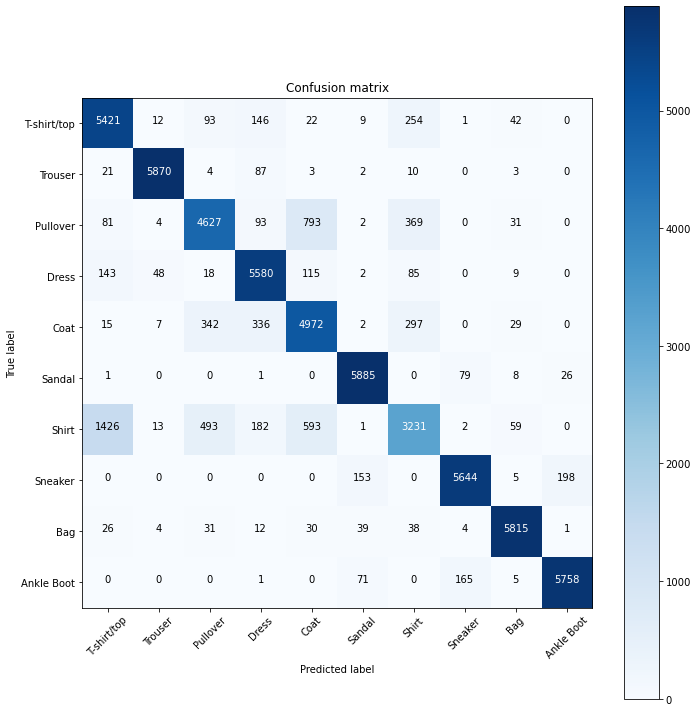

In [47]:
names = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')
plt.figure(figsize=(10,10))
#plot_confusion_matrix(cm,names)
plot_confusion_matrix(confusion_mat,names)

#### TensorBoard

In [3]:
from tensorboardX import SummaryWriter
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

In [4]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
    
    def forward(self,t):
        # (1) input layer
        t  = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2,stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t,dim=1)
        
        return t

In [6]:
tb = SummaryWriter()

train_set = torchvision.datasets.FashionMNIST(
        root= './DeepLearningData/FashionMNIST',
        train = True,
        download=True, # extract
        # transform
        transform=transforms.Compose([
            transforms.ToTensor()
        ])
    )
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100)

network = Network()
images,labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb.add_image('images',grid)
tb.add_graph(network,(images,))
tb.close()

In [7]:
batch_size = 100
lr = 0.01
epochs = 2

network = Network()
train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size)
optimizer = optim.Adam(network.parameters(),lr=lr)

images,labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

comment = f'batch_size={batch_size} lr={lr}'
tb = SummaryWriter(comment=comment)
tb.add_images('images',grid)
tb.add_graph(network,images)

for epoch in range(epochs):
    total_loss = 0
    total_correct = 0
    
    for batch in train_loader:
        images,labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * batch_size
        total_correct += get_num_correct(preds,labels)
    
    tb.add_scalar('Loss',total_loss,epoch)
    tb.add_scalar('Number Correct',total_correct,epoch)
    tb.add_scalar('Accuracy',total_correct/len(train_set),epoch)
    
    
    
    #tb.add_histogram('conv1.bias',network.conv1.bias,epoch)
    #tb.add_histogram('conv1.weight',network.conv1.weight,epoch)
    #tb.add_histogram('conv1.weight.grad',network.conv1.weight.grad,epoch)
    
    for name , weight in network.named_parameters():
        tb.add_histogram(name,weight,epoch)
        tb.add_histogram(f'{name}.grad',weight.grad,epoch)

    print('epoch:',epoch,'total_correct:',total_correct,'loss:',total_loss)

tb.close()

AssertionError: size of input tensor and input format are different.         tensor shape: (3, 392, 242), input_format: NCHW

In [8]:
from collections import OrderedDict
from collections import namedtuple
from itertools import product

In [9]:
class RunBuilder():
    @staticmethod
    def get_runs(params):
        
        Run = namedtuple('Run',params.keys())
        
        runs = []
        for v in product(*params.values()):
            runs.append(Run(*v))
        
        return runs

In [20]:
params = OrderedDict(
    lr = [.01,.001],
    batch_size = [1000,10000]
    #device = ['cuda','cpu']
)
runs = RunBuilder.get_runs(params)
runs

[Run(lr=0.01, batch_size=1000),
 Run(lr=0.01, batch_size=10000),
 Run(lr=0.001, batch_size=1000),
 Run(lr=0.001, batch_size=10000)]

In [19]:
epochs = 100
for run in RunBuilder.get_runs(params):
    comment = f'-{run}'
    
    # Training process
    network = Network()
    train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size)
    optimizer = optim.Adam(network.parameters(),lr=lr)

    images,labels = next(iter(train_loader))
    grid = torchvision.utils.make_grid(images)

    tb = SummaryWriter(comment=comment)
    tb.add_images('images',grid)
    tb.add_graph(network,images)

    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0

        for batch in train_loader:
            images,labels = batch

            preds = network(images)
            loss = F.cross_entropy(preds,labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * batch_size
            total_correct += get_num_correct(preds,labels)

        tb.add_scalar('Loss',total_loss,epoch)
        tb.add_scalar('Number Correct',total_correct,epoch)
        tb.add_scalar('Accuracy',total_correct/len(train_set),epoch)



        #tb.add_histogram('conv1.bias',network.conv1.bias,epoch)
        #tb.add_histogram('conv1.weight',network.conv1.weight,epoch)
        #tb.add_histogram('conv1.weight.grad',network.conv1.weight.grad,epoch)

        for name , weight in network.named_parameters():
            tb.add_histogram(name,weight,epoch)
            tb.add_histogram(f'{name}.grad',weight.grad,epoch)

        print('epoch:',epoch,'total_correct:',total_correct,'loss:',total_loss)

    tb.close()